# Importing Libraries

In [19]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt 
from sklearn.svm import SVR, LinearSVC, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

# 🎯 1. Generate Dataset (10 features, only 3 useful)

In [2]:
X,y,true_coefs = make_regression(n_samples = 1000, n_features = 10, n_informative = 3, coef=True, noise=15)

## 🔹 n_samples = 1000

**What it means:** You're generating 1000 data points (rows in X).

**Why it matters:** More samples → more realistic training set.

## 🔹 n_features = 10

**What it means:** The dataset will have 10 input features (columns in X).

**Why it matters:** This defines the dimensionality of your input space. In this case, each sample has 10 variables.

## 🔹 n_informative=3

**What it means:** Out of the 10 features, only 3 are actually useful for predicting the target y.

**Why it matters:** The remaining 7 features are noise — they don’t help predict y, and are there to simulate real-world data with irrelevant features.

## 🔹 coef=True

**What it means:** The function will return the true underlying coefficients used to generate the target y.

### Why Do We Compare Coefficients?

When you're using models like Linear Regression, Lasso, or Ridge, the model learns a coefficient (weight) for each feature — this tells you:

How much each feature contributes to the prediction.

🔸 If a coefficient is large (positive or negative):
That feature has a big impact on the target y.

🔸 If a coefficient is near zero:
That feature has little to no impact on the target.

In Lasso, it might even be exactly zero → Feature eliminated!

model.coef_ = [0.0, 0.0, 42.3, -21.5, 0.0, 15.2, 0.0, 0.0, 0.0, 5.6]

**This means:**

    Feature 2 has a strong positive relationship with the target

    Feature 3 has a strong negative relationship

    Feature 5 and 9 have moderate influence

    Others have almost no effect

**In Lasso:**

**Zero coefficients** → features dropped automatically (built-in feature selection)

**Why it matters:** You can use true_coefs to compare with the coefficients learned by your model (like Lasso or Ridge), and visualize sparsity or weight shrinkage.

## 🔹 noise=15

**What it means:**

Adds Gaussian noise with standard deviation = 15 to the output y.

**Why it matters:** 

This simulates measurement error or randomness in real-world target values. Higher noise makes the problem harder.

**In simple words:**

It simulates real-world measurement error or natural variability in the data.

**🔍 What does it do?**

When make_regression() generates the target y, it does something like this:

**y = X @ true_coefs + random_noise**

That random_noise part is controlled by the noise parameter. It’s Gaussian (normal) noise with a mean of 0 and standard deviation = noise.

**noise = 15**

Random values with standard deviation 15 are added to y.

Now y is not perfectly predictable.

R² will be < 1.0, depending on how much noise was added.

### 🧠 Why Add Noise?

**Reason	Explanation**

🧪 Make it realistic	In real life, target values always have randomness or measurement error.

🧠 Test model robustness	Can your model still learn the correct pattern in the presence of noise?

🧹 Test regularization	L1/L2 regularization helps when data is noisy — by preventing overfitting.

🎯 Simulate challenges	High noise = harder problem. Great for benchmarking different models.


# Split data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# 🔵 2. Linear Regression (No Regularization)

In [4]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

linear_result = {
    "Model": "Linear Regression",
    "MSE": mean_squared_error(y_test, y_pred_linear),
    "R^2": r2_score(y_test, y_pred_linear),
    "coef": linear_model.coef_
}
linear_result

{'Model': 'Linear Regression',
 'MSE': 214.96021109800387,
 'R^2': 0.9717562963725707,
 'coef': array([-6.92862627e-03,  3.31087938e-01,  5.31124930e+01, -1.02279087e-01,
         3.12910019e+01,  5.29129741e-01, -8.46240484e-01,  5.62894307e+01,
         2.71263581e-01, -1.29286882e+00])}

# 🟢 3. Lasso Regression (L1 Regularization)

* Encourages some weights to become exactly zero ⇒ Feature selection. look into **lasso_result["coef"]**

**Useful when:**

* You suspect only a few features are relevant.

* You want a simpler, more interpretable model.

In [5]:
# lasso_model = Lasso(alpha=0.1) # alpha=0.1 controls the strength of regularization:

                               # Higher alpha → more aggressive regularization (more coefficients shrink to 0).

                               # Lower alpha → behaves more like Linear Regression.
lasso_model = Lasso(alpha=20)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

lasso_result = {
    "Model": "Lasso(l1)",
    "MSE": mean_squared_error(y_pred_lasso, y_test),
    "R^2": r2_score(y_pred_lasso, y_test),
    "coef": lasso_model.coef_
}
lasso_result

{'Model': 'Lasso(l1)',
 'MSE': 1466.6817706037411,
 'R^2': 0.47127872872173726,
 'coef': array([-0.        ,  0.        , 34.20593621, -0.        , 10.61564163,
         0.        , -0.        , 36.06334563, -0.        , -0.        ])}

# 🔴 4. Ridge Regression (L2 Regularization)
* Shrinks all coefficients but doesn’t eliminate them ⇒ No feature selection. look in **ridge_result["coef"]**

**Useful when:**

* All features may contribute a little.

* You want to reduce multicollinearity.

In [6]:
ridge_model = Ridge(alpha=20)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

ridge_result = {
    "Model": "Ridge(l2)",
    "MSE": mean_squared_error(y_pred_ridge, y_test),
    "R^2": r2_score(y_test, y_pred_ridge),
    "coef": ridge_model.coef_
}
ridge_result

{'Model': 'Ridge(l2)',
 'MSE': 218.18127970078837,
 'R^2': 0.971333078947746,
 'coef': array([-0.06077323,  0.36355416, 51.85911489, -0.10877082, 30.48520384,
         0.52080173, -0.87714172, 54.92983284,  0.163749  , -1.27874551])}

# 📊 5. Combine and Compare Results

In [7]:
results_df = pd.DataFrame([
    {
        'Model': linear_result['Model'],
        'MSE': linear_result['MSE'],
        'R^2': linear_result['R^2']
    },
    {
        'Model': lasso_result['Model'],
        'MSE': lasso_result['MSE'],
        'R^2': lasso_result['R^2']
    },
    {
        'Model': ridge_result['Model'],
        'MSE': ridge_result['MSE'],
        'R^2': ridge_result['R^2']
    }
]).round(3)

print("🔍 Model Performance Comparison:")
results_df

🔍 Model Performance Comparison:


,Model,MSE,R^2
0,Linear Regression,214.960,0.972
1,Lasso(l1),1466.682,0.471
2,Ridge(l2),218.181,0.971


# 📈 6. Plot Coefficient Comparison

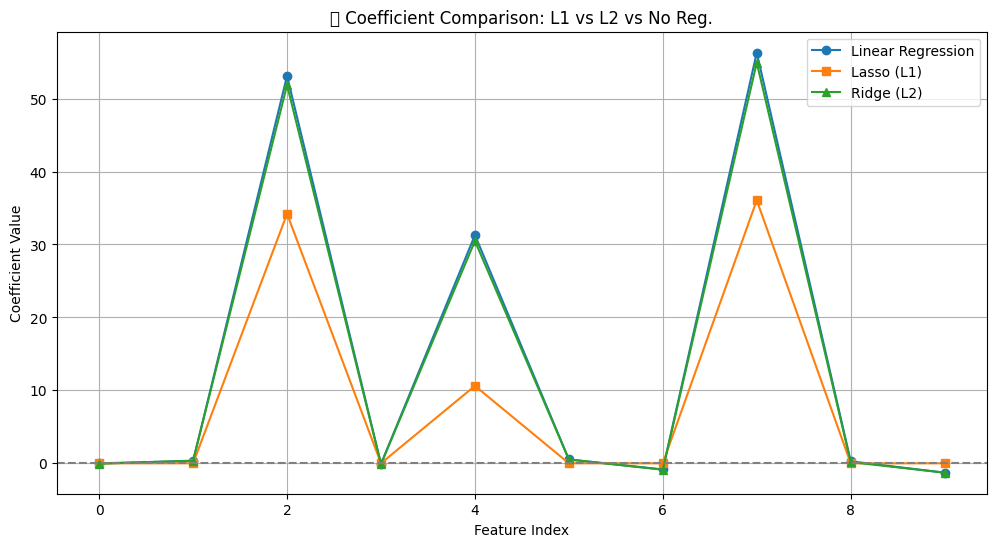

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(linear_result['coef'], label='Linear Regression', marker='o')
plt.plot(lasso_result['coef'], label='Lasso (L1)', marker='s')
plt.plot(ridge_result['coef'], label='Ridge (L2)', marker='^')
plt.axhline(0, color='gray', linestyle='--')
plt.title("📉 Coefficient Comparison: L1 vs L2 vs No Reg.")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()

### 📌 Interpretation
**Linear Regression:** Highest R², but may overfit or use irrelevant features.

**Lasso (L1):** Slightly lower R², but some coefficients are exactly zero → ideal when you want a simpler, more interpretable model.

**Ridge (L2):** Balanced shrinkage; no coefficient becomes zero, but handles multicollinearity well.



## Below is a breakdown of how to use L1 and L2 regularization in various ML models with code examples.

In [9]:
X_train.shape, y_train.shape

((800, 10), (800,))

### ✅ 1. Logistic Regression – Use penalty='l1' or 'l2'

In [10]:
from sklearn.linear_model import LogisticRegression
# 2. Convert regression target into binary classification (e.g. class 0 or 1)
y_binary = (y > y.mean()).astype(int)  # Class 1 if above mean, else 0
# 3. Train-test split just for this logistic regressor 
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X, y_binary, test_size=0.2, random_state=42)

### Train L1 Regularized Logistic Regression

In [11]:
logreg_l1_model = LogisticRegression(penalty="l1",solver="liblinear" ,C=0.1, random_state=42)
logreg_l1_model.fit(X_train_copy, y_train_copy)
y_pred_logreg_l1 = logreg_l1_model.predict(X_test_copy)
logreg_l1_result = {
    "Model": "LogReg_L1",
    "Accuracy_Score": accuracy_score(y_test_copy, y_pred_logreg_l1),
    "coef": logreg_l1_model.coef_
}
logreg_l1_result

{'Model': 'LogReg_L1',
 'Accuracy_Score': 0.935,
 'coef': array([[-0.02834135,  0.        ,  2.90562106,  0.        ,  1.73736337,
          0.01824192, -0.01799553,  3.15270767,  0.        ,  0.        ]])}

### Train L2 Regularized Logistic Regression

In [12]:
logreg_l2_model = LogisticRegression(penalty="l2", C=0.1, random_state=42)
logreg_l2_model.fit(X_train_copy, y_train_copy)
y_pred_logreg_l2 = logreg_l2_model.predict(X_test_copy)
logreg_l2_result = {
    "Model": "LogReg_L2",
    "Accuracy_Score": accuracy_score(y_test_copy, y_pred_logreg_l2),
    "coef": logreg_l2_model.coef_
}
logreg_l2_result

{'Model': 'LogReg_L2',
 'Accuracy_Score': 0.92,
 'coef': array([[-0.17453375,  0.02113389,  2.05036846, -0.02013051,  1.28277259,
          0.14501684, -0.1388447 ,  2.22008242,  0.02795822, -0.01333435]])}

### ✅ 2. Support Vector Machine (SVM) – L2 Regularization by Default

In [13]:
# L2-regularized SVM (default)
 # Smaller C = stronger regularization
svr_l2_model = SVR(kernel="linear", C=1.0)
svr_l2_model.fit(X_train, y_train)
y_pred_svr = svr_l2_model.predict(X_test)
svr_result = {
    "Model": "SVM Regressor",
    "MSE": mean_squared_error(y_test, y_pred_svr),
    "R^2": r2_score(y_test, y_pred_svr),
    "coef": svr_l2_model.coef_
}
svr_result

{'Model': 'SVM Regressor',
 'MSE': 220.8639583825852,
 'R^2': 0.9709806007787432,
 'coef': array([[-0.56357075,  0.25624909, 52.44310189, -0.44707476, 31.32945864,
          0.17114549, -1.47092153, 55.06860079,  0.08340718, -1.07225292]])}

**Unfortunately**, LinearSVR only supports L2 penalty. so we go with classification dataset for this now 

In [14]:
svm_l1_model = LinearSVC(penalty='l1', dual=False, C=1.0)
svm_l1_model.fit(X_train_copy, y_train_copy)
y_pred_LinearSVC = svm_l1_model.predict(X_test_copy)

linear_svc_result = {
    "Model": "LinearSVC",
    "Accuracy_Score": accuracy_score(y_test_copy, y_pred_LinearSVC),
    "coef": svr_l2_model.coef_
}
linear_svc_result

{'Model': 'LinearSVC',
 'Accuracy_Score': 0.92,
 'coef': array([[-0.56357075,  0.25624909, 52.44310189, -0.44707476, 31.32945864,
          0.17114549, -1.47092153, 55.06860079,  0.08340718, -1.07225292]])}

### ✅ 3. Random Forest / Tree Models – Use max_depth, min_samples_split, max_leaf_nodes to simulate regularization

In [15]:
random_fr_model = RandomForestRegressor(max_depth=5, min_samples_split=10, max_leaf_nodes=20)
random_fr_model.fit(X_train, y_train)
y_pred_random_fr = random_fr_model.predict(X_test)
random_fr_result = {
    "Model": "RandomForestRegressor",
    "MSE": mean_squared_error(y_test, y_pred_random_fr),
    "R^2": r2_score(y_test, y_pred_random_fr),
}
random_fr_result

{'Model': 'RandomForestRegressor',
 'MSE': 978.2699674092572,
 'R^2': 0.8714647381206515}

### ✅ 4. XGBoost / LightGBM / CatBoost – Use reg_alpha (L1) and reg_lambda (L2)

### XGBoost

In [16]:
xgb_model = XGBRegressor(reg_alpha = 1.0, reg_lambda = 0.5)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

xgb_result = {
    "Model": "XGBRegressor",
    "MSE": mean_squared_error(y_test, y_pred_xgb),
    "R^2": r2_score(y_test, y_pred_xgb),
}
xgb_result

{'Model': 'XGBRegressor', 'MSE': 490.81568558349943, 'R^2': 0.935511541003308}

### LightGBM

In [17]:
lgbm_model = LGBMRegressor(reg_alpha=1.0, reg_lambda=0.5)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
lgbm_result = {
    "Model": "LGBMRegressor",
    "MSE": mean_squared_error(y_test, y_pred_lgbm),
    "R^2": r2_score(y_test, y_pred_lgbm),
}
lgbm_result

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score 0.896971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

{'Model': 'LGBMRegressor',
 'MSE': 415.10456842663507,
 'R^2': 0.9454592533885788}

### ✅ 5. Neural Networks (Keras) – L1 and L2 in Dense Layers

In [24]:
nn_model = Sequential([
    Dense(64, input_dim=10, activation='relu',
          kernel_regularizer=regularizers.l1(0.01)),  # L1 Regularization
    Dense(1, activation='linear')
])
nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train, y_train, epochs=50, batch_size=32)
y_pred_nn = nn_model.predict(X_test)

y_pred_nn

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 7176.1152
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7674.7944 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7378.6357 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7102.8350 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7211.9917 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7157.1875 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 6913.8926
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 7385.6025
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6331.6084 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 6963.9463
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 6362.9136
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 5596.2808
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5914.8149 
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 5633.0879
Epoch 15/50
25/25 ━━━━

array([[ 122.86266   ],
       [ -51.258514  ],
       [   0.95214397],
       [  29.868242  ],
       [  61.294956  ],
       [ -43.596222  ],
       [ -77.19449   ],
       [-107.74395   ],
       [  88.593315  ],
       [ -28.127954  ],
       [ -26.424406  ],
       [ -22.577211  ],
       [  63.928997  ],
       [ -20.169394  ],
       [ -53.799812  ],
       [-121.330475  ],
       [-165.68427   ],
       [-124.97791   ],
       [ -94.798775  ],
       [ 180.87357   ],
       [ -11.810659  ],
       [ -38.36953   ],
       [  44.11989   ],
       [ -60.380222  ],
       [ -61.627045  ],
       [  59.387627  ],
       [ 107.06703   ],
       [ -46.792374  ],
       [-112.27697   ],
       [  83.251785  ],
       [-112.66348   ],
       [  35.449825  ],
       [  87.56027   ],
       [ -25.974566  ],
       [ -48.273228  ],
       [  96.6921    ],
       [ -31.634552  ],
       [  32.489117  ],
       [-104.52637   ],
       [ -16.033863  ],
       [-109.077095  ],
       [  37.202

In [26]:
nn_model_result = {
    "Model": "Neural Network",
    "MSE": mean_squared_error(y_test, y_pred_nn),
    "R^2": r2_score(y_test, y_pred_nn),
}
nn_model_result

{'Model': 'Neural Network',
 'MSE': 350.76128869189955,
 'R^2': 0.9539133413054172}

You can use regularizers.l2() or regularizers.l1_l2() as well.